In [1]:
# imports
import pandas as pd
import numpy as np
import feature_engine 
import pickle
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
PROCESSED_DATA_PATH = '../data/processed/1_preprocessed_df.pkl'
ENCODED_DATA_PATH = '../data/processed/1_encoded_df.pkl'

TARGET_COL = 'DevType'
with open('../data/variables/possible_predictors.pkl', 'rb') as f:
    PREDICTOR_COLS = pickle.load(f)

In [4]:
df = pd.read_pickle(PROCESSED_DATA_PATH)
df = df.loc[:,df.columns[df.columns.str.contains('HaveWorkedWith')].tolist()+[TARGET_COL]]
TECH_COLS = df.columns.tolist()

In [5]:
df.head()

,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,DevType
0,"[C++, HTML/CSS, JavaScript, Objective-C, PHP, ...","[PostgreSQL, SQLite]",[],"[Laravel, Symfony]",[],[],"[PHPStorm, Xcode]","[Developer, mobile]"
1,"[JavaScript, Python]",[PostgreSQL],[],"[Angular, Flask, Vue.js]",[Cordova],"[Docker, Git, Yarn]","[Android Studio, IntelliJ, Notepad++, PyCharm]",[]
2,"[Assembly, C, Python, R, Rust]",[SQLite],[Heroku],[Flask],"[NumPy, Pandas, TensorFlow, Torch/PyTorch]",[],"[IPython/Jupyter, PyCharm, RStudio, Sublime Te...",[]
3,"[JavaScript, TypeScript]",[],[],"[Angular, jQuery]",[],[],[],"[Developer, front-end]"
4,"[Bash/Shell, HTML/CSS, Python, SQL]","[Elasticsearch, PostgreSQL, Redis]",[],[Flask],"[Apache Spark, Hadoop, NumPy, Pandas]","[Docker, Git, Kubernetes, Yarn]","[Atom, IPython/Jupyter, Notepad++, PyCharm, Vim]","[Developer, desktop or enterprise applications..."


In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

dfs = {}

for col in df.columns:
    dfs[col] = pd.DataFrame(
        mlb.fit_transform(df[col]),
        columns=mlb.classes_,
        index=df[col].index
    )
df_encoded = pd.concat(
    dfs, 
    axis=1
)
df_encoded.head()


LanguageHaveWorkedWith                                                      \
                     APL Assembly Bash/Shell  C C# C++ COBOL Clojure Crystal   
0                      0        0          0  0  0   1     0       0       0   
1                      0        0          0  0  0   0     0       0       0   
2                      0        1          0  1  0   0     0       0       0   
3                      0        0          0  0  0   0     0       0       0   
4                      0        0          1  0  0   0     0       0       0   

                                                                           \
  Dart Delphi Elixir Erlang F# Go Groovy HTML/CSS Haskell Java JavaScript   
0    0      0      0      0  0  0      0        1       0    0          1   
1    0      0      0      0  0  0      0        0       0    0          1   
2    0      0      0      0  0  0      0        0       0    0          0   
3    0      0      0      0  0  0      0        0       0    0          1   
4    0      0      0      0  0  0      0        1       0    0          0   

                                                                              \
  Julia Kotlin LISP Matlab Node.js Objective-C PHP Perl PowerShell Python  R   
0     0      0    0      0       0           1   1    0          0      0  0   
1     0      0    0      0       0           0   0    0          0      1  0   
2     0      0    0      0       0           0   0    0          0      1  1   
3     0      0    0      0       0           0   0    0          0      0  0   
4     0      0    0      0       0           0   0    0          0      1  0   

                                           DatabaseHaveWorkedWith            \
  Ruby Rust SQL Scala Swift TypeScript VBA              Cassandra Couchbase   
0    0    0   0     0     1          0   0                      0         0   
1    0    0   0     0     0          0   0                      0         0   
2    0    1   0     0     0          0   0                      0         0   
3    0    0   0     0     0          1   0                      0         0   
4    0    0   1     0     0          0   0                      0         0   

                                                                        \
  DynamoDB Elasticsearch Firebase IBM DB2 MariaDB Microsoft SQL Server   
0        0             0        0       0       0                    0   
1        0             0        0       0       0                    0   
2        0             0        0       0       0                    0   
3        0             0        0       0       0                    0   
4        0             1        0       0       0                    0   

                                               PlatformHaveWorkedWith  \
  MongoDB MySQL Oracle PostgreSQL Redis SQLite                    AWS   
0       0     0      0          1     0      1                      0   
1       0     0      0          1     0      0                      0   
2       0     0      0          0     0      1                      0   
3       0     0      0          0     0      0                      0   
4       0     0      0          1     1      0                      0   

                                                                 \
  DigitalOcean Google Cloud Platform Heroku IBM Cloud or Watson   
0            0                     0      0                   0   
1            0                     0      0                   0   
2            0                     0      1                   0   
3            0                     0      0                   0   
4            0                     0      0                   0   

                                              WebframeHaveWorkedWith  \
  Microsoft Azure Oracle Cloud Infrastructure                ASP.NET   
0               0                           0                      0   
1               0                           0                      0 

### Jobs Frequency
Observation:
- Handle imbalance.
- Drop un-relevant jobs(Marketing, other, etc)

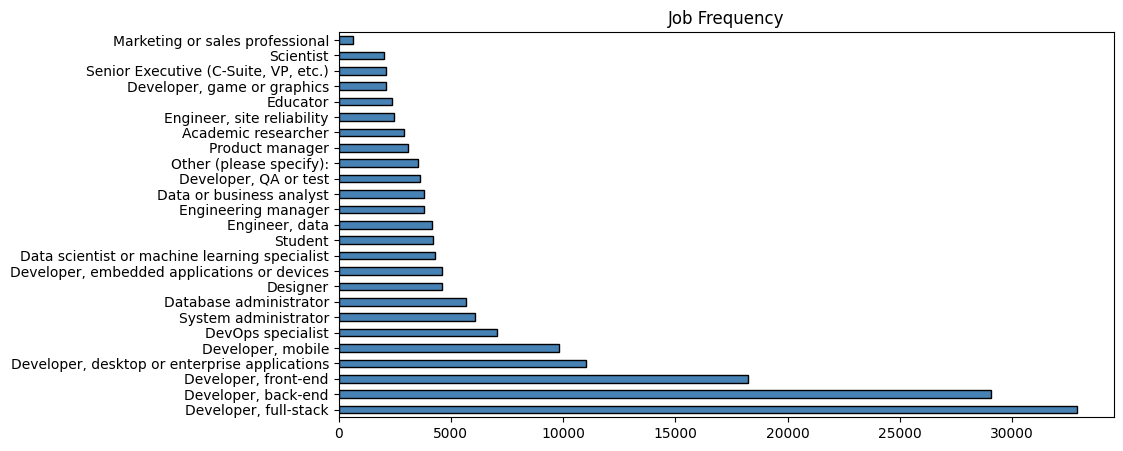

In [7]:
plt.figure(figsize=(15, 10))
job_freq = df_encoded['DevType'].sum(axis=0).sort_values(ascending=False)
job_freq.plot.barh(figsize=(10, 5), color='steelblue', edgecolor='black')
plt.title('Job Frequency')
plt.show()

### Skill Frequency

In [11]:
skills_freq = df_encoded.drop(TARGET_COL,axis=1).sum(axis=0).sort_values(ascending=False).reset_index()
skills_freq.columns = ['Skill_Category','Skill', 'Frequency']
display(
    skills_freq.head(10),
    skills_freq.tail(10)
)

,Skill_Category,Skill,Frequency
0,ToolsTechHaveWorkedWith,Git,68171
1,NEWCollabToolsHaveWorkedWith,Visual Studio Code,58026
2,LanguageHaveWorkedWith,JavaScript,53587
3,LanguageHaveWorkedWith,HTML/CSS,46259
4,LanguageHaveWorkedWith,Python,39792
5,LanguageHaveWorkedWith,SQL,38835
6,ToolsTechHaveWorkedWith,Docker,35644
7,DatabaseHaveWorkedWith,MySQL,35289
8,LanguageHaveWorkedWith,Java,29162
9,PlatformHaveWorkedWith,AWS,29138


,Skill_Category,Skill,Frequency
115,PlatformHaveWorkedWith,Oracle Cloud Infrastructure,1014
116,ToolsTechHaveWorkedWith,Chef,982
117,ToolsTechHaveWorkedWith,Flow,929
118,LanguageHaveWorkedWith,F#,804
119,NEWCollabToolsHaveWorkedWith,TextMate,678
120,LanguageHaveWorkedWith,Erlang,651
121,LanguageHaveWorkedWith,APL,536
122,LanguageHaveWorkedWith,Crystal,466
123,LanguageHaveWorkedWith,COBOL,437
124,ToolsTechHaveWorkedWith,Pulumi,368


In [12]:
import plotly.express as px

fig = px.treemap(
    skills_freq,
    path=['Skill_Category', 'Skill'],  # Hierarchy: Category → Skill
    values='Frequency',               # Size of boxes based on frequency
    color='Frequency',                # Color intensity by frequency
    color_continuous_scale='Blues',   # Color scale
    title='Skills Frequency Treemap'
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

### Analyzing Jobs& Skills with Heatmap

In [92]:

jobs = df_encoded['DevType'].sum(axis=0).sort_values(ascending=True).index.to_list()
skills = [skill for group, skill in df_encoded.drop(TARGET_COL,axis=1).columns.tolist()]
jobs_skills = {}
for job in jobs:
    mask = df_encoded.loc[:,TARGET_COL][job] ==1
    jobs_skills[job] = df_encoded.loc[mask,:].drop(TARGET_COL,axis=1).mean().reset_index().drop('level_0',axis=1).rename(columns={0:'Frequency'}).loc[:,'Frequency']*100
jobs_skills_df= pd.DataFrame(jobs_skills)
jobs_skills_df.index = skills

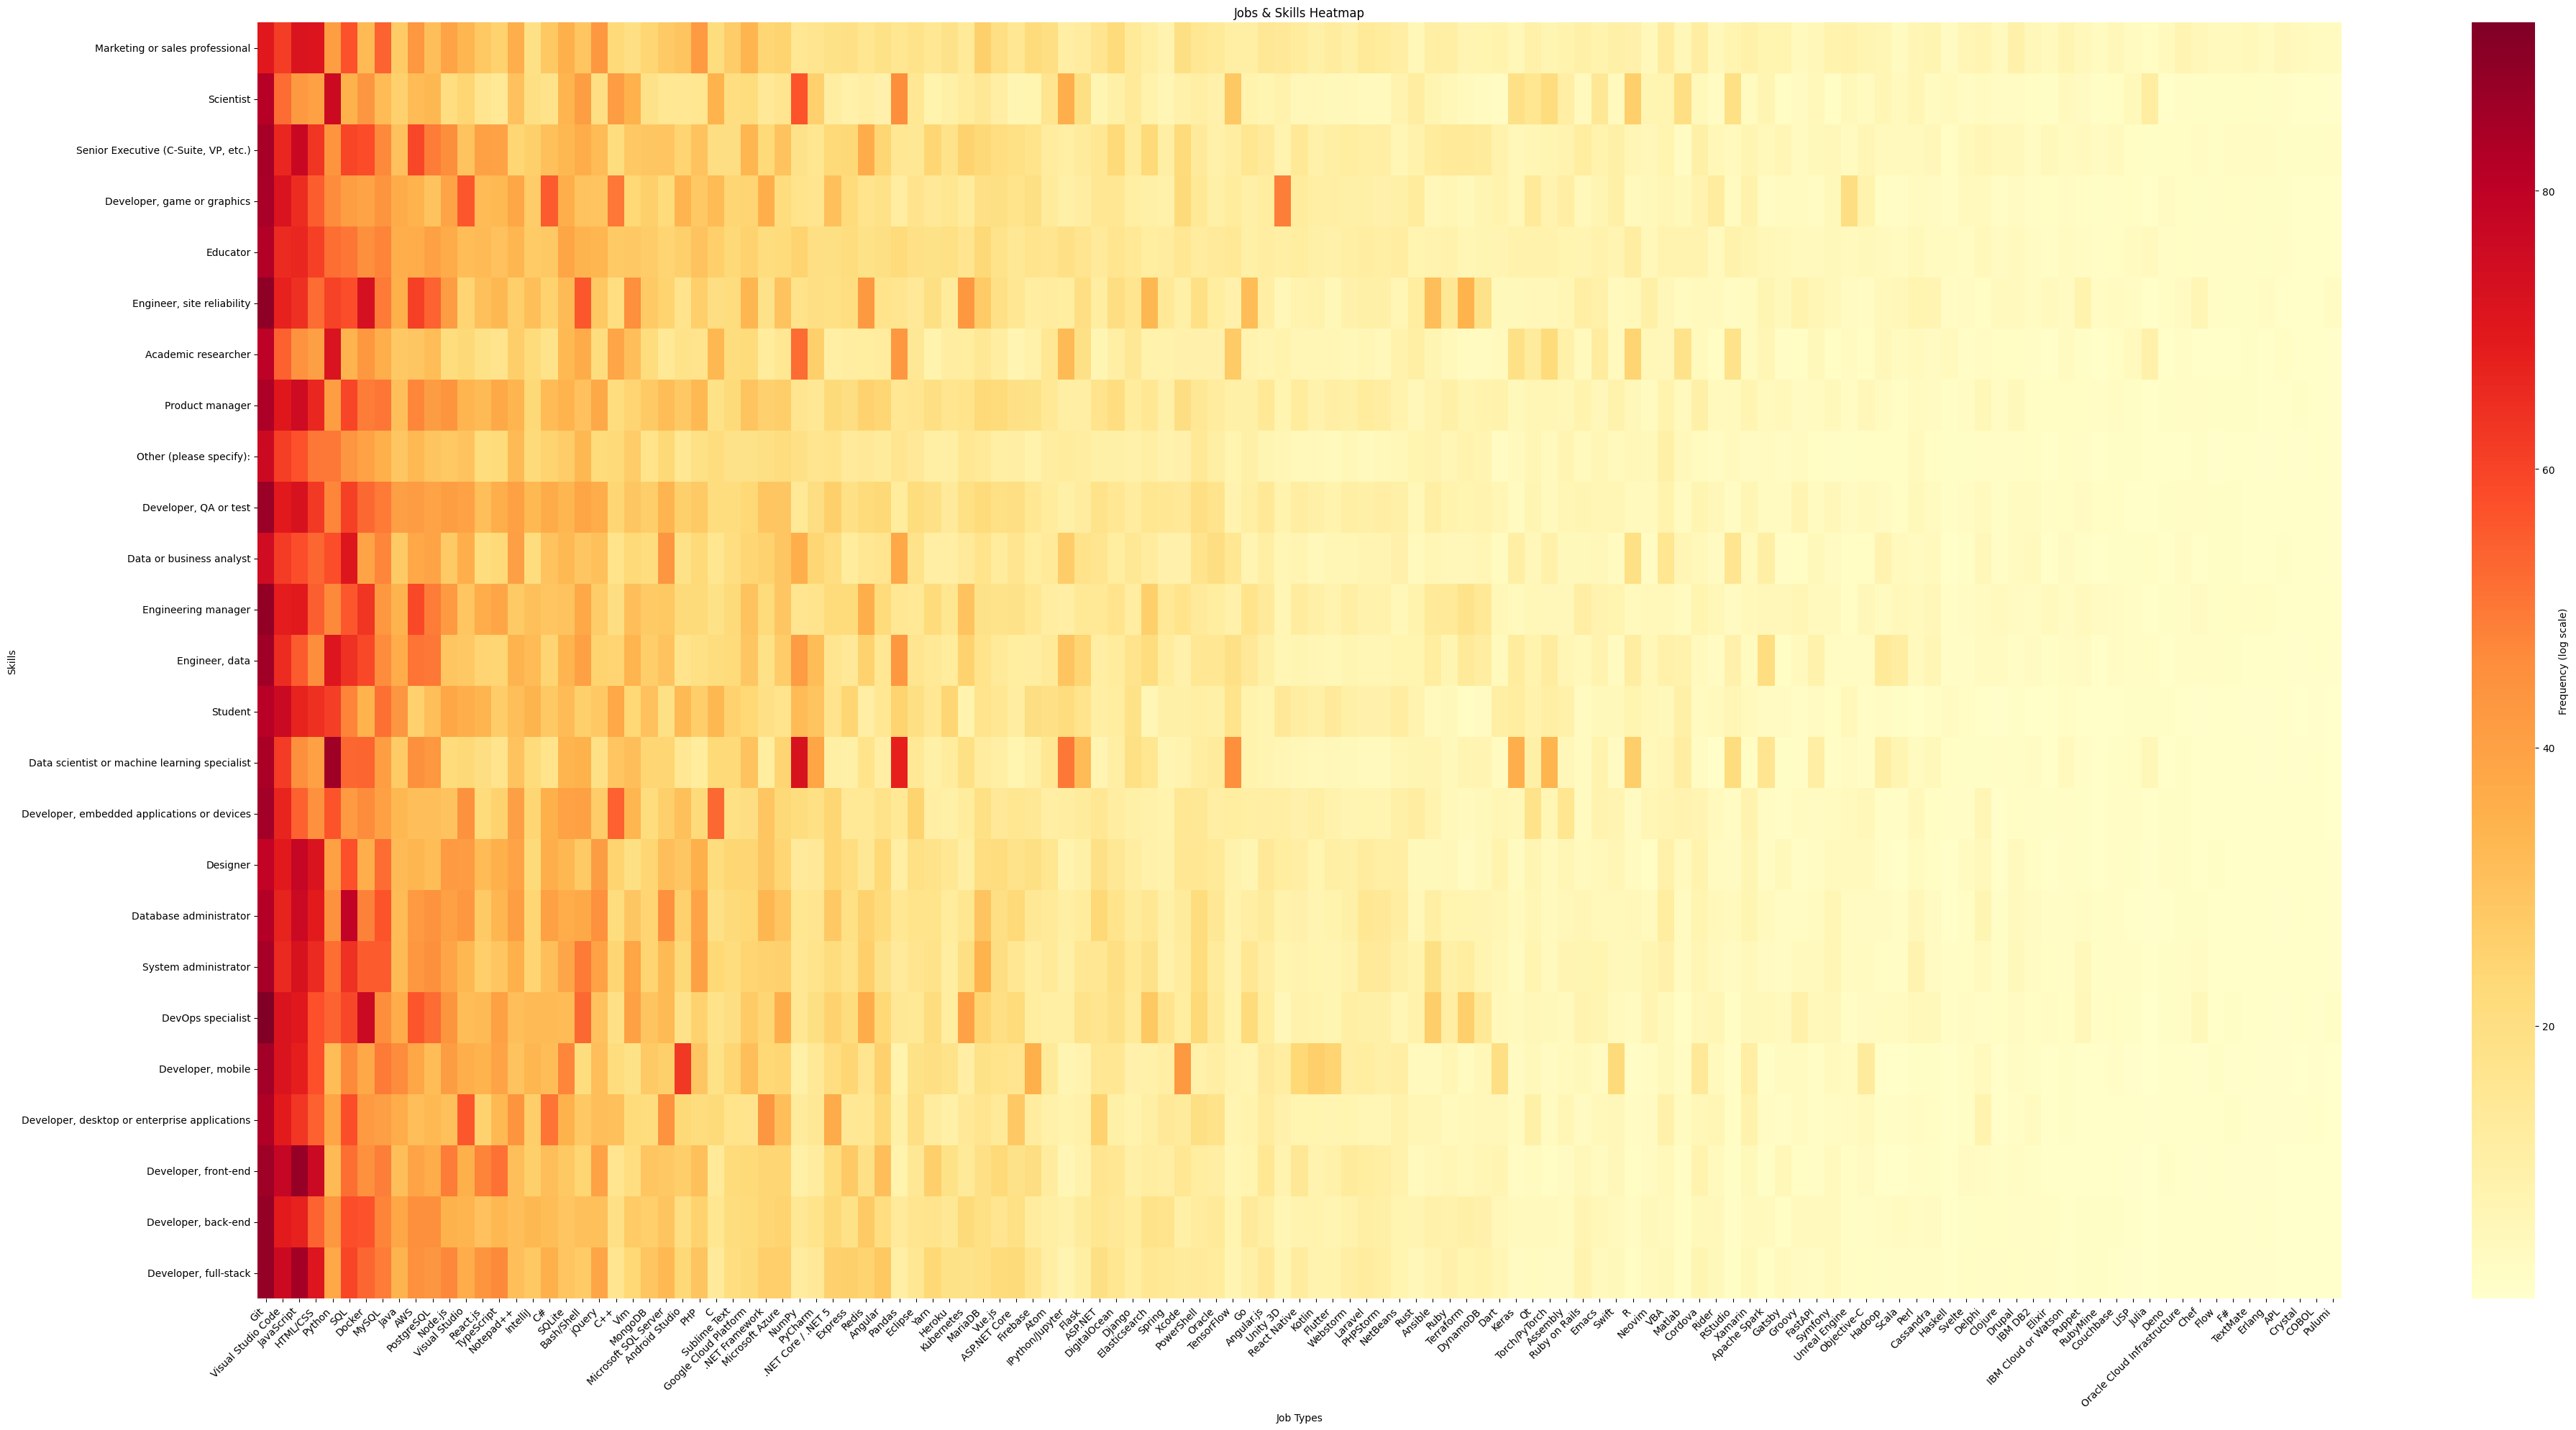

In [95]:
import seaborn as sns

# Create heatmap with normalized data
plt.figure(figsize=(40, 20))
sns.heatmap(jobs_skills_df.loc[skills_freq['Skill'].to_list(),:].T, 
            cmap='YlOrRd',
            cbar_kws={'label': 'Frequency (log scale)'})

plt.title('Jobs & Skills Heatmap')
plt.xlabel('Job Types')
plt.ylabel('Skills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

- We notice that some skills are not frequent while other is common for alot jobs.
- We need to analyze specifity of skills with jobs: we need to rescaling(normalizing) the skills. 

In [97]:
# standard scaler
from sklearn.preprocessing import StandardScaler
jobs_skills = jobs_skills_df.loc[skills_freq['Skill'].to_list(),:].T
jobs_skills_normalized = StandardScaler().fit_transform(jobs_skills)
jobs_skills_normalized = pd.DataFrame(jobs_skills_normalized , columns=jobs_skills.columns, index=jobs_skills.index) 

Important Note: 
- Some jobs don't have specific skill set, we need to delete them. Ex: `Other`.
- Some jobs have same specificity skill set. Ex: `Academic Research` and `Educator`. 

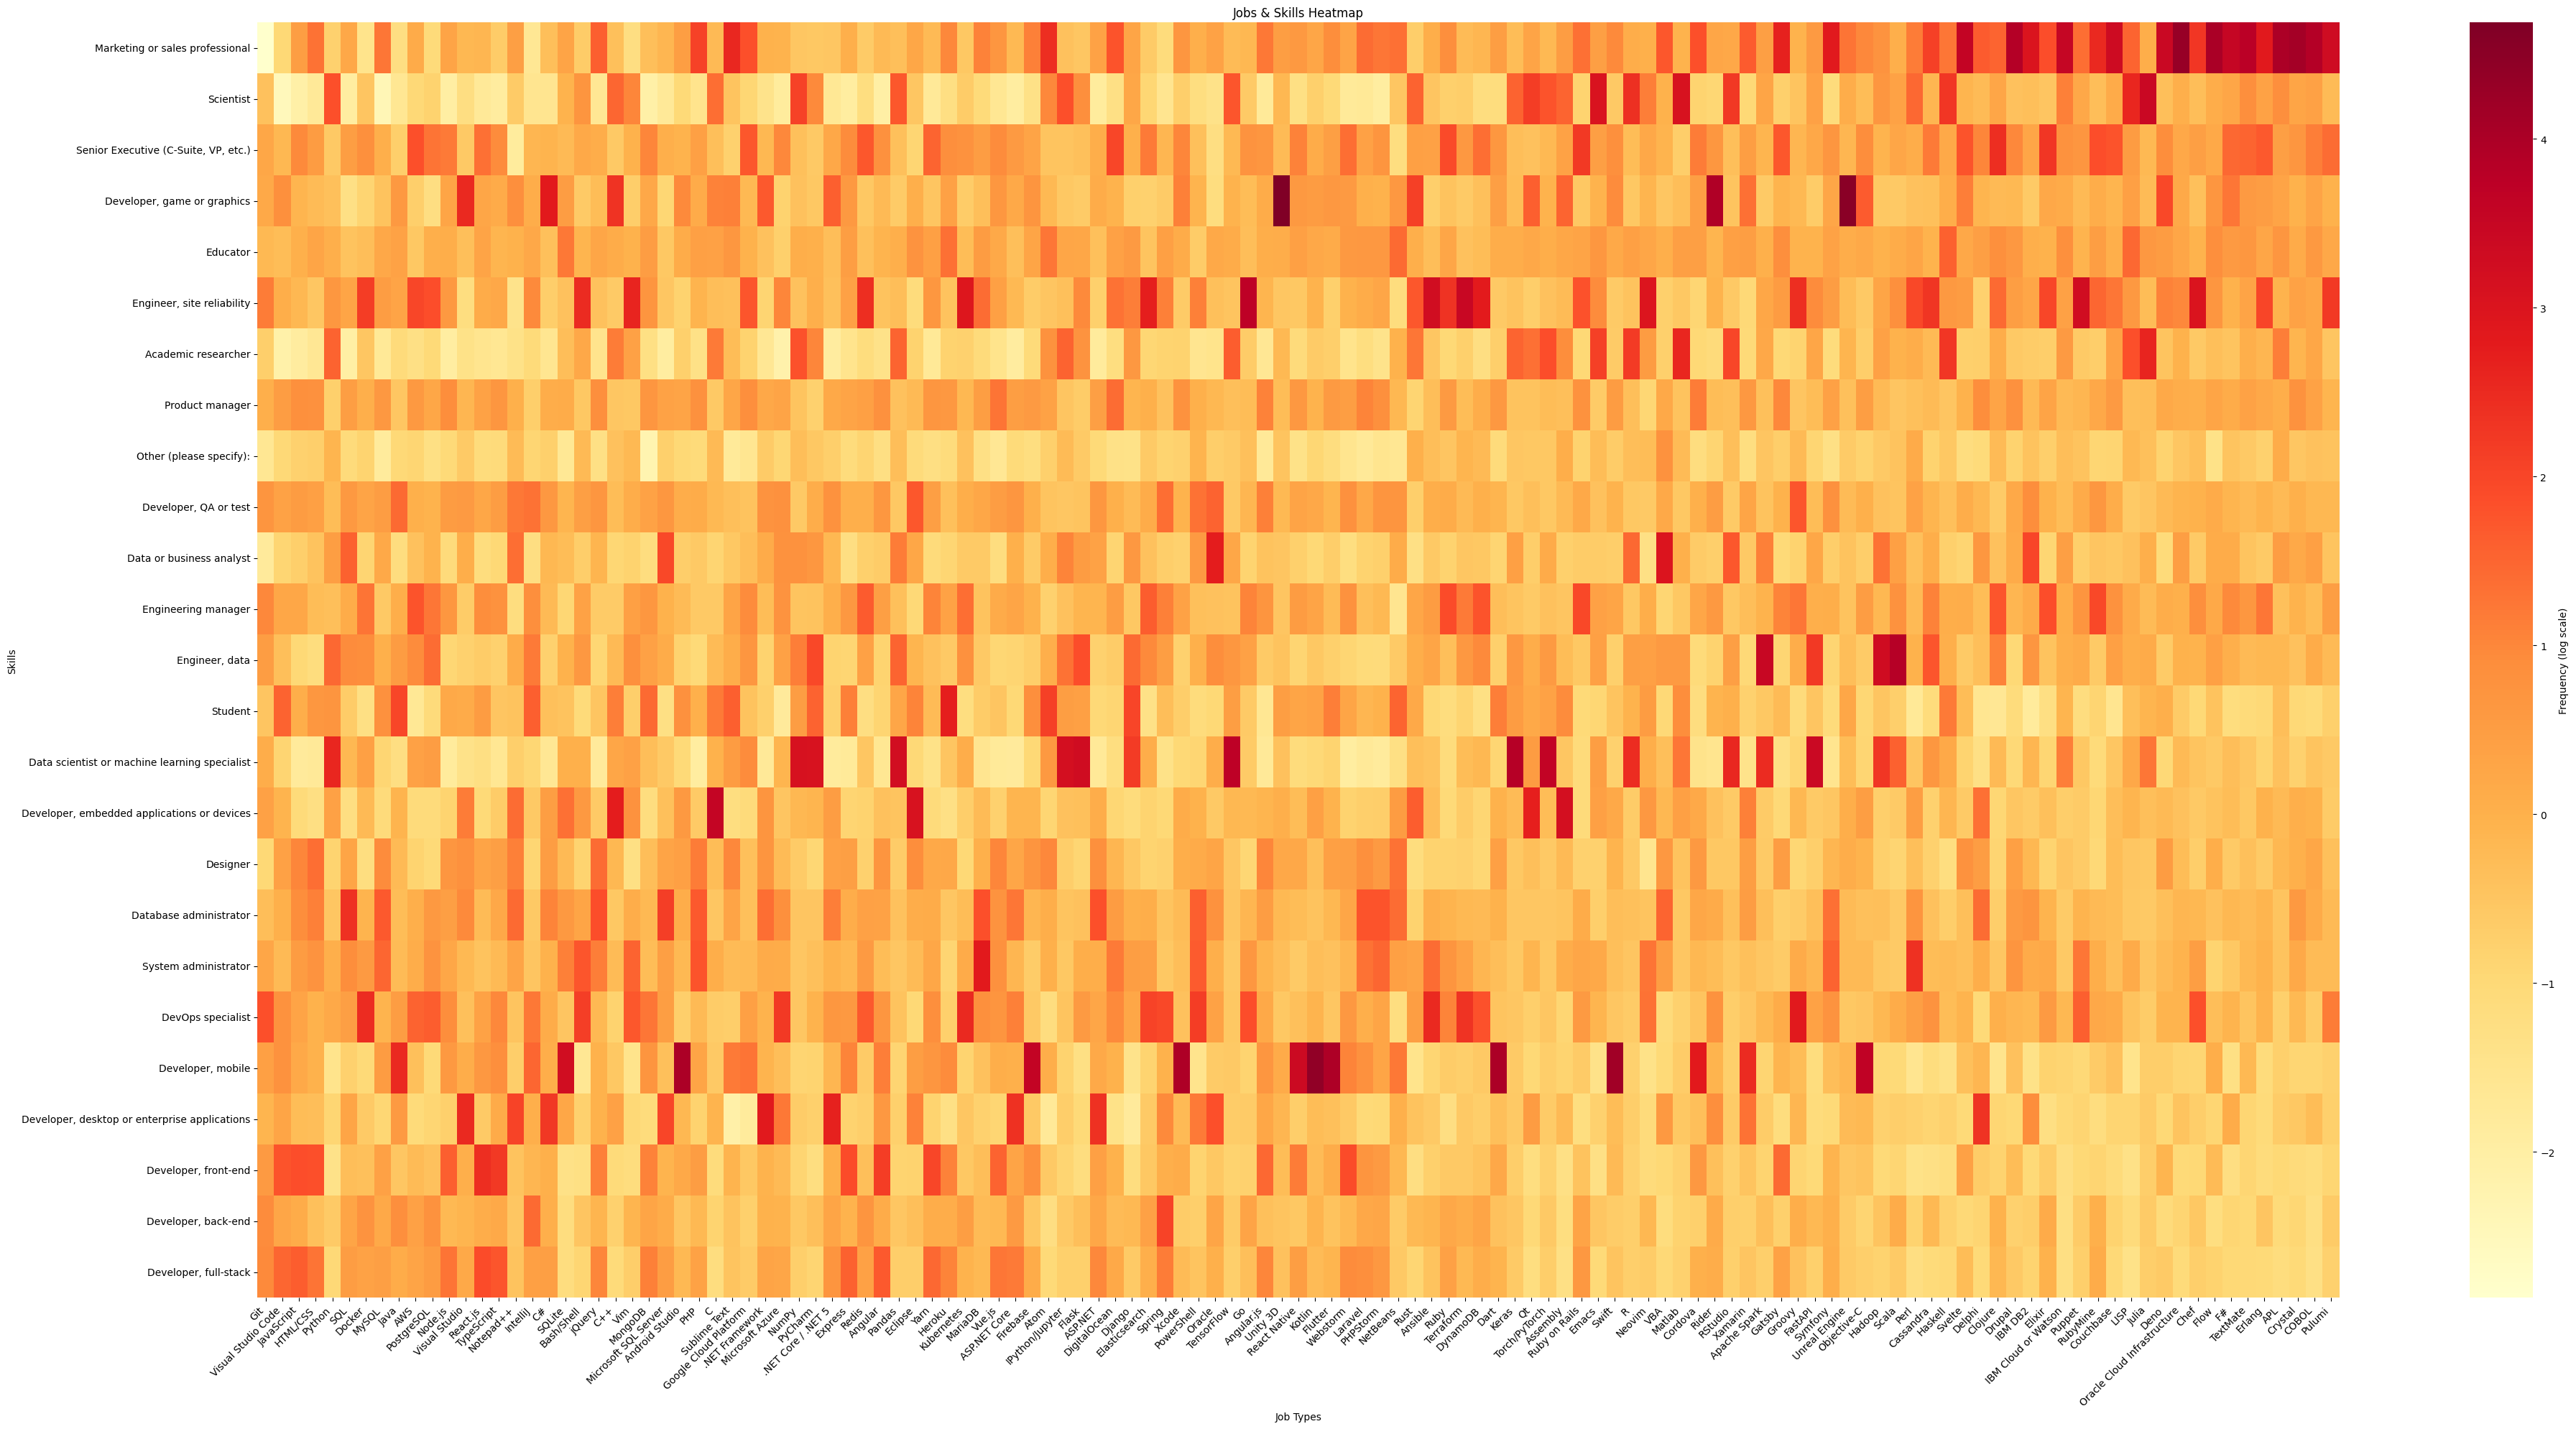

In [99]:
import seaborn as sns

# Create heatmap with normalized data
plt.figure(figsize=(40, 20))
sns.heatmap(jobs_skills_normalized, 
            cmap='YlOrRd',
            cbar_kws={'label': 'Frequency (log scale)'})

plt.title('Jobs & Skills Heatmap')
plt.xlabel('Job Types')
plt.ylabel('Skills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Relations between jobs

Observation:
- Some of these jobs will be either combined or removed.
Combine:
- `Academic Research` and `Educator`.
- `DevOps` and `site reliability`.

Remove:
- `Student`, `Others` , `Senior Excutive` and `Marketing Proffesional`.


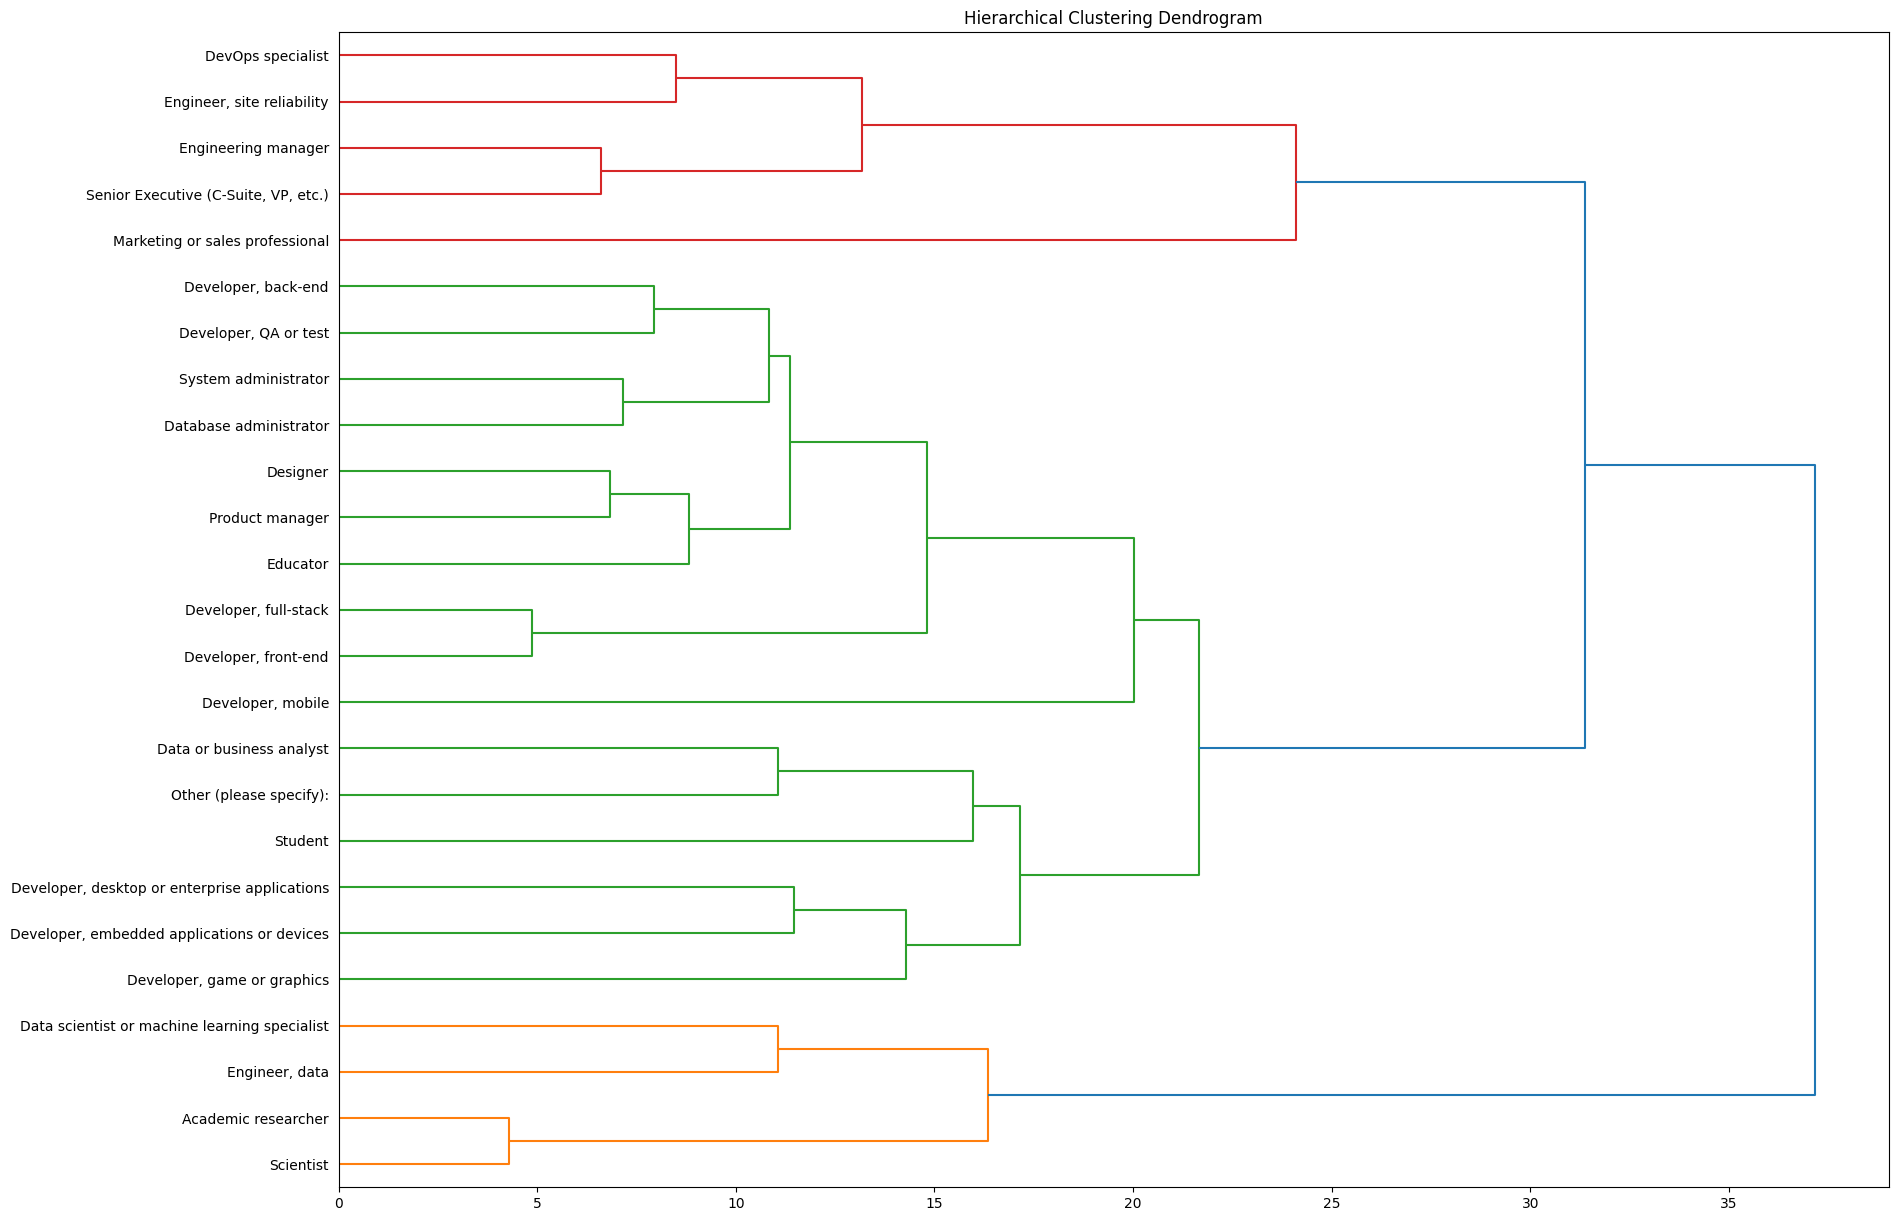

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(jobs_skills_normalized, method='ward')
plt.figure(figsize=(20, 15))
dendrogram(Z, labels=jobs_skills_normalized.index.to_list(),orientation= 'right')
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


### Export DF

In [ ]:
df_encoded.to_pickle(ENCODED_DATA_PATH)